<a href="https://colab.research.google.com/github/gabivoiq/ep-plotting/blob/main/EP_Plotting_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EP - Python Scientific Computing & Basic Plotting (Numpy & Matplotlib) 

In this lab, we will study a new library in python that offers fast, memory efficient manipulation of vectors, matrices and tensors: **numpy**. We will also study basic plotting of data using the most popular data visualization libraries in the python ecosystem: **matplotlib**. 


In [ ]:
# Some IPython magic
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2

import numpy as np


## Python scientific computing ecosystem
For scientific computing we need an environment that is easy to use, and provides a couple of tools like manipulating data and visualizing results.
Python is very easy to use, but the downside is that it's not fast at numerical computing. Luckily, we have very eficient libraries for all our use-cases.

## Libraries

### Core computing libraries

- `numpy` and `scipy`: scientific computing
- `matplotlib`: plotting library

### Machine Learning
- `sklearn`: machine learning toolkit
- `tensorflow`: deep learning framework developed by google
- `keras`: deep learning framework on top of `tensorflow` for easier implementation
- `pytorch`: deep learning framework developed by facebook


## Statistics and data analysis
- `pandas`: very popular data analysis library
- `statsmodels`: statistics

We also have advanced interactive environments:
- Ipython: advanced python console
- Jupyter: notebooks in the browser

There are many more scientific libraries available.

Check out these cheetsheets for fast reference to the common libraries:

**Cheat sheets:**
- [python](https://perso.limsi.fr/pointal/_media/python:cours:mementopython3-english.pdf)
- [numpy](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
- [matplotlib](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
- [sklearn](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)
- [pandas](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

**Other:**
- [Probabilities & Stats Refresher](https://stanford.edu/~shervine/teaching/cs-229/refresher-probabilities-statistics)
- [Algebra](https://stanford.edu/~shervine/teaching/cs-229/refresher-algebra-calculus)

# numpy
`numpy` works with tensors of data, the main data structure is `numpy.array` or `numpy.ndarray`.


**Why it is useful:** Memory-efficient container that provides fast numerical operations.

### Speed test

In [ ]:
%timeit [x**2 for x in range(1000)]

1000 loops, best of 3: 270 µs per loop


In [ ]:
%timeit np.arange(1000)**2

The slowest run took 33.10 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.51 µs per loop


It is clear that math operations using numpy arrays are far more efficient computation-wise than using plain python lists. More than that, numpy arrays offer a rich API for ***tensor*** manipulation.

![](https://miro.medium.com/max/1000/0*jGB1CGQ9HdeUwlgB)

### Working with numpy arrays

a few important attributes of the `array` structure: 
- `ndarray.ndim` - number of axes (tensor rank)
- `ndarray.shape` - tuple, gives dimensions of each axes.
- `ndarray.size` - size of the array (product of elements of `ndarray.shape`)
- `ndarray.dtype` - data type

In [ ]:
a = np.array([[2,8,5],[0,-1,2]])
print(a)
print("Dim:  ",a.ndim)
print("Shape:",a.shape)
print("Size: ",a.size)
print("Type: ",a.dtype)

[[ 2  8  5]
 [ 0 -1  2]]
Dim:   2
Shape: (2, 3)
Size:  6
Type:  int64


## Shape Manipulation

![](https://fgnt.github.io/python_crashkurs_doc/_images/numpy_array_t.png)

In [ ]:
x = np.array([1,1,2])
x.shape

(3,)

In [ ]:
x.reshape(1,3)

array([[1, 1, 2]])

In [ ]:
x.reshape(1,4) # this will fail because dimensions don't match

ValueError: ignored

In [ ]:
x.reshape(1,-1)

In [ ]:
a = np.floor(10*np.random.random((3,4))) # some random matrix
a

In [ ]:
a.shape # a tuple that describes the shape of the object

In [ ]:
a.ravel() # flattened list

NameError: ignored

In [ ]:
a.T # transpose

In [ ]:
a.reshape(2,1,-1) # -1 means "as much as you need", such that the dimensions maches the size

![](https://i.pinimg.com/originals/79/08/bd/7908bd4f6d0040cb0df7a20de6d814fc.png)

## Initializing
- `np.zeros(shape)`
- `np.ones(shape)`
- `np.empty(shape)`
- `np.eye(rows, cols)`

Those functions take as input the shape of an array. 


## Sequences
- `np.arange` - like Python's `range()`, but returns a `np.array`
- `np.linspace` - n equidistant points in interval [a,b]


In [ ]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [ ]:
np.linspace(1, 2, 5)

array([1.  , 1.25, 1.5 , 1.75, 2.  ])

## Math operators
Math operators are applied elementwise. ( `*` is never the dot product for numpy arrays!)

In [ ]:
a = np.ones((2,3), dtype=int)
a *= 3
a

array([[3, 3, 3],
       [3, 3, 3]])

In [ ]:
a = a - 1
a

array([[1, 1, 1],
       [1, 1, 1]])

In [ ]:
a = a + np.ones_like(a) / 5
a

array([[1.2, 1.2, 1.2],
       [1.2, 1.2, 1.2]])

In [ ]:
print("Pointwise multiplication:\n", a * np.ones_like(a) * 2 )
print("Dot Product (matrix multiplication)\n", np.dot(a.T, np.ones_like(a) * 2))

NameError: ignored

## Linear Algebra
numpy has implementations of some of the most common algebraic operations.
The most common one, the dot product is implemented both as a method of the array object and as a numpy function.

Matrix multiplication can be performed either using the dot product or `np.matmul`. Using functions from numpy you can 
- find eigenvalues and eigenvectors, 
- compute some decompositions (QR, SVD), 
- compute determinant of a matrix, 
- norm of a vector,
- solve a linear system
- invert a matrix

See [the documentation](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html)

# Matplotlib

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Almost all python plotting frameworks make use of matplotlib behind the scenes. 

Plotting data is an effective way to convey the message hidden in the data. A good plot is worth a thousand words, and it can be difficult to unambiguously transmit your intended message. Different types of plots that represent the same data (i.e. scatter plots, linear plots, bar plots, pie charts etc.) can be perceived differently depending on who's looking.

Check out this article for some tips on better plotting:

[Ten Simple Rules for Better Figures](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)

**NB:** Do note that, regardless of the type of plot and data, ***all*** plots must have properly annotated axis ticks, axis labels, a title and a caption.


For a more comprehensive tutorial on matplotlib, check out this resource:

[Matplotlib Tutorial – A Complete Guide to Python Plot w/ Examples](https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

## The elements of a plot

### The figure and the axes
The figure is the entire image, the individual plots are called "axes". Here's a description from matplotlib's documentation.

![](https://matplotlib.org/_images/anatomy1.png)

# Scatter & Line Plots

Scatter plots are used to plot data points on horizontal and vertical axis in the attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker the position depends on its values in the columns set on the X and Y axes. A third variable can be set to correspond to the color or size of the markers, thus adding yet another dimension to the plot.


We will plot a simple regression line with generated data.

In [ ]:
M = 10
N = 5

X = np.random.random(size = 100)
y_true = M * X + N

y_noise = y_true + np.random.normal(size = 100)

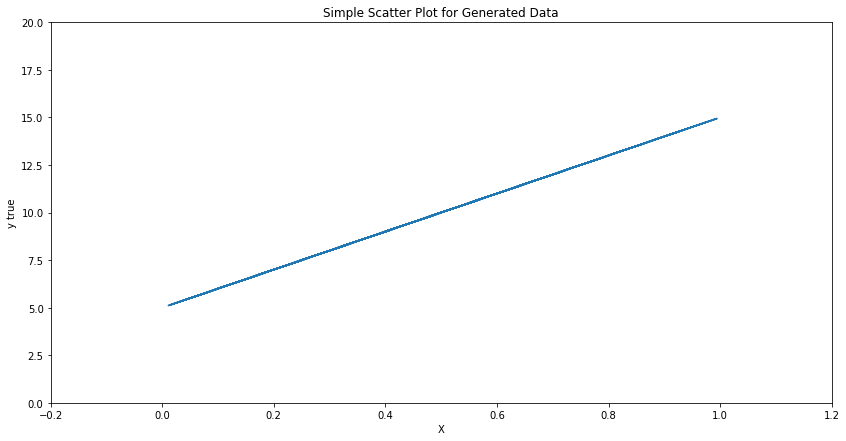

In [ ]:
plt.plot(X, y_true)
plt.xlim(-0.2, 1.2)
plt.ylim(0, 20)

plt.xlabel("X")
plt.ylabel("y true")

plt.title("Simple Scatter Plot for Generated Data")
plt.gcf().set_size_inches(14, 7)


Text(0.5, 1.0, 'Simple Scatter Plot for Generated Data')

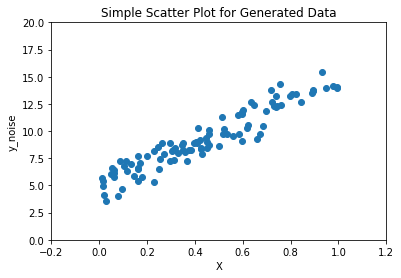

In [ ]:
plt.scatter(X, y_noise)
plt.xlim(-0.2, 1.2)
plt.ylim(0, 20)

plt.xlabel("X")
plt.ylabel("y_noise")

plt.title("Simple Scatter Plot for Generated Data")

We can plot the two variables one on top of the other, for a better visualization. Make sure to add a legend, and different coloring, such that it is clear which part of the plot belongs to which set of variables.

Matplotlib also offers a wide range of **markers** to better differentiate between multiple data categories. Check https://matplotlib.org/api/markers_api.html for a full list.

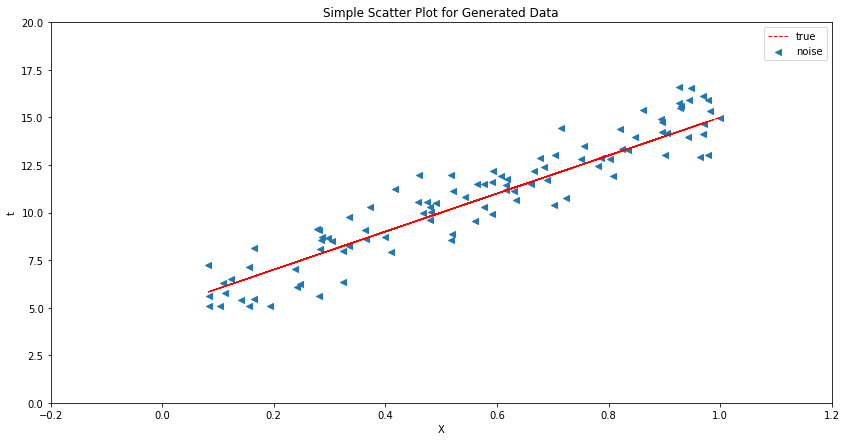

In [ ]:
plt.scatter(X, y_noise, label = 'noise', marker = '<')
plt.plot(X, y_true, color = 'r', label = 'true', linestyle = 'dashed', linewidth = 1)

plt.xlim(-0.2, 1.2)
plt.ylim(0, 20)

plt.xlabel("X")
plt.ylabel("t")

plt.title("Simple Scatter Plot for Generated Data")
plt.legend()
plt.gcf().set_size_inches(14, 7)

# Bar Plots

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value.

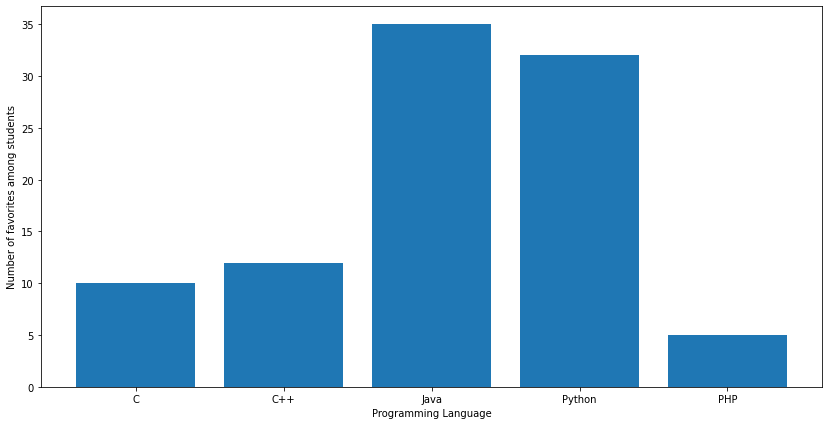

In [ ]:
languages = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [10, 12, 35, 32, 5]

ax = plt.subplot()
ax.bar(languages, students)

plt.xlabel('Programming Language')
plt.ylabel("Number of favorites among students")
plt.gcf().set_size_inches(14, 7)

We can make multiple bars for each category. It makes it easier for comparing different quantities with a common category.

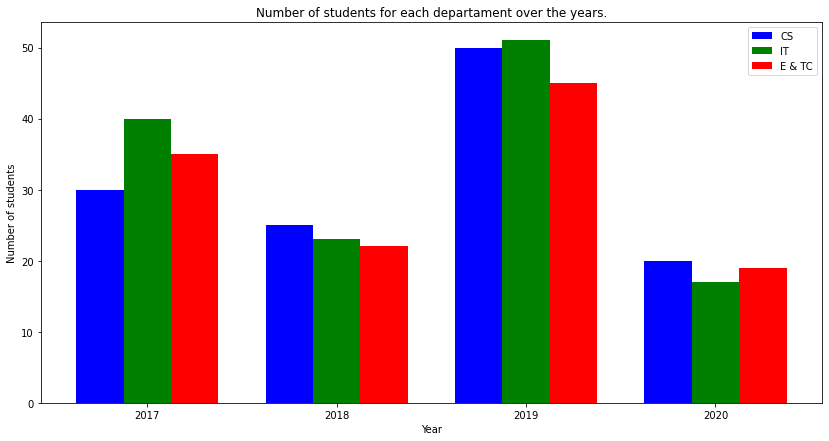

In [ ]:
data = [
  [30, 25, 50, 20],
  [40, 23, 51, 17],
  [35, 22, 45, 19]
]

X = np.arange(4)
ax = plt.subplot()

ax.bar(X + 0.00, data[0], color = 'b', width = 0.25, label = 'CS')
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25, label = 'IT')
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25, label = 'E & TC')

ax.set_xticks(X + 0.25)
ax.set_xticklabels(X + 2017)

plt.xlabel("Year")
plt.ylabel("Number of students")
plt.title("Number of students for each departament over the years.")
ax.legend()
plt.gcf().set_size_inches(14, 7)

# Box Plots

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.


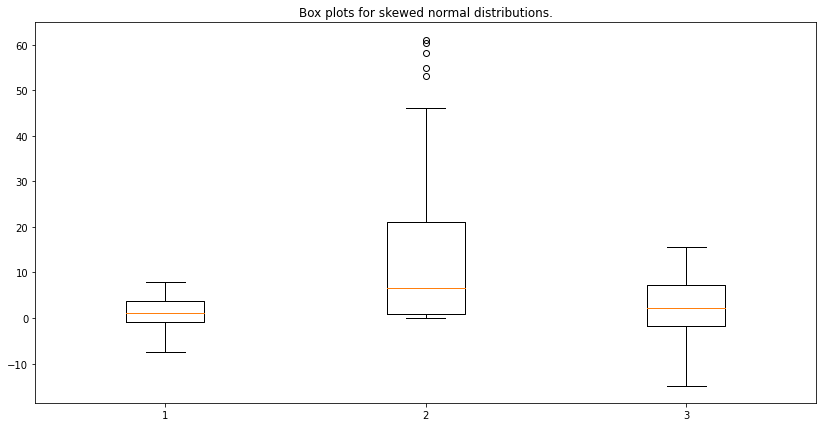

In [ ]:
data = np.random.normal(size = 100, scale = 3.0, loc = 1.0)

ax = plt.subplot()
ax.boxplot([data, data ** 2, data * 2])

plt.title("Box plots for skewed normal distributions.")
plt.gcf().set_size_inches(14, 7)

# Exercises

After you finish your lab exercises, you should export this notebook as **pdf** and upload it to Moodle. (i.e. **File -> Print**, Destination: Save as PDF).

## 1. System of linear equations

Using numpy, solve the following linear equation:



$\begin{bmatrix}
   1 & 2 & 3.3 & 2 \\
   3 & 3.6 & 7 & 0 \\
   1 & 3 & -1 & 12 \\
   2 & 11 & 4 & 16
\end{bmatrix}
\begin{bmatrix}
   x_1 \\
   x_2 \\
   x_3 \\
   x_4
\end{bmatrix}=\begin{bmatrix}
   10 \\
   15 \\
   3 \\
   -1
\end{bmatrix}$

In [ ]:
# Your code here
A = np.array([
             [1, 2, 3.3, 2],
             [3, 3.6, 7, 0],
             [1, 3, -1, 12],
             [2, 11, 4, 16],
])
C = np.array([10, 15, 3, -1])
X = np.linalg.solve(A, C)
print(X)
print(np.allclose(np.dot(A, X), C))

[-1.28937298 -4.34942596  4.9322932   1.85582867]
True


## 2. Simple numpy exercises

1. Given an matrix, calculate the sum for each row

2. Given an vector, normalize the vector using the $l_{10}$ norm

In [ ]:
M = np.array([
    [1, 2, 3],
    [9, 3, 10],
    [3, 5, 0],
    [1, 7, -3],
    [0, -2, 3],
    
])

v = np.array([100, 2302, 2, -10, 134, -1])
print(M.sum(axis=1))
print(np.linalg.norm(v, ord=10))
# Your code here

[ 6 22  8  5  1]
2302.000000000109


## 3. Harder numpy exercises

Using the matrix and vector defined above:

1. Subtract the mean of each column in a given matrix.

2. Get the 3rd largest value in an array.


In [ ]:
# Your code here
mean_array = M.mean(axis=0)
print(mean_array)
print(M - mean_array)

n = v.size - 1

print(np.partition(v, n)[n-2])

[2.8 3.  2.6]
[[-1.8 -1.   0.4]
 [ 6.2  0.   7.4]
 [ 0.2  2.  -2.6]
 [-1.8  4.  -5.6]
 [-2.8 -5.   0.4]]
100


## 4. Plot some functions
Using numpy and matplotlib, plot the following functions (you can choose the colors and styling, interval of interest and other parameters):

$f_1(x) = max(0, x)$

$f_2(x) = \frac{e^{2x} - 1}{e^{2x} + 1}$

$f_3(x) = \frac{1}{1 + e^{-x}}$

$f_4(x) = \frac{1}{\mu^2 + 1}*e^{-\frac{(x - \mu)^2}{b^2}}$

$f_5(x) = 0.5x (1 + tanh(0.797885x + 0.035677x^3))$

Note that all plots should have relevant ticks, labels and a title.  

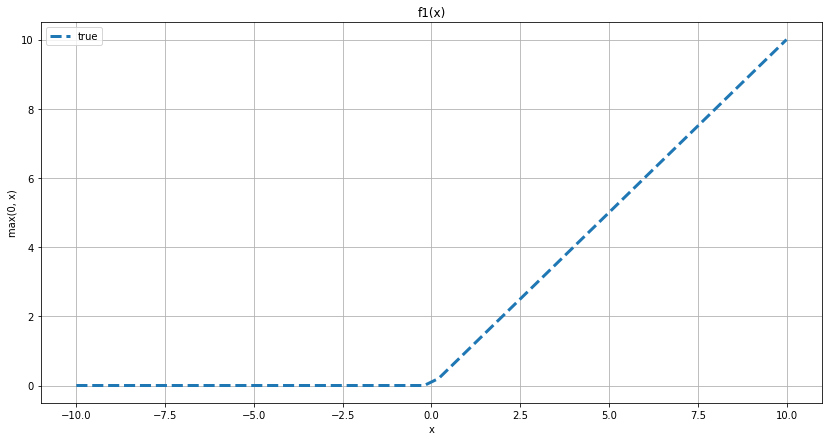

In [ ]:
# Your code here
x = np.linspace(-10, 10)
y = np.maximum(0, x)

plt.plot(x, y, label="true", linestyle = 'dashed', linewidth = 3)
plt.ylabel("max(0, x)")
plt.xlabel("x")
plt.title("f1(x)")
plt.legend()
plt.grid()
plt.gcf().set_size_inches(14, 7)

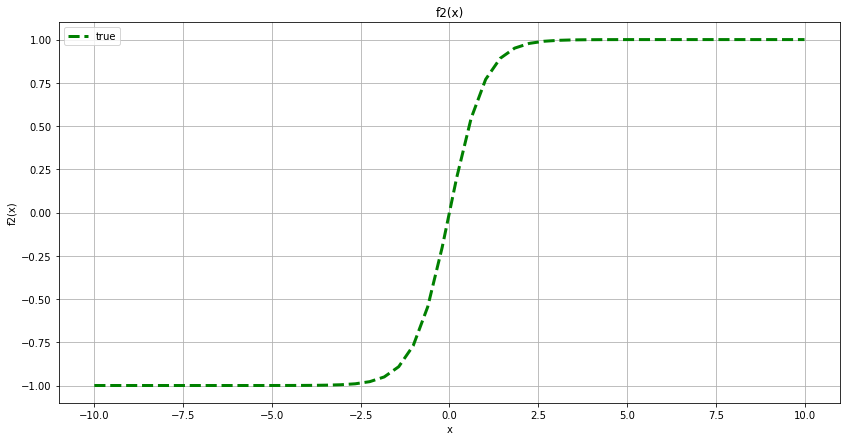

In [ ]:
x = np.linspace(-10, 10)
y = (np.exp(2 * x) - 1) / (np.exp(2 * x) + 1)

plt.plot(x, y, color = 'green', label = 'true', linestyle= 'dashed', linewidth = 3)

plt.xlabel("x")
plt.ylabel("f2(x)")

plt.legend()
plt.grid()
plt.title("f2(x)")
plt.gcf().set_size_inches(14,7)

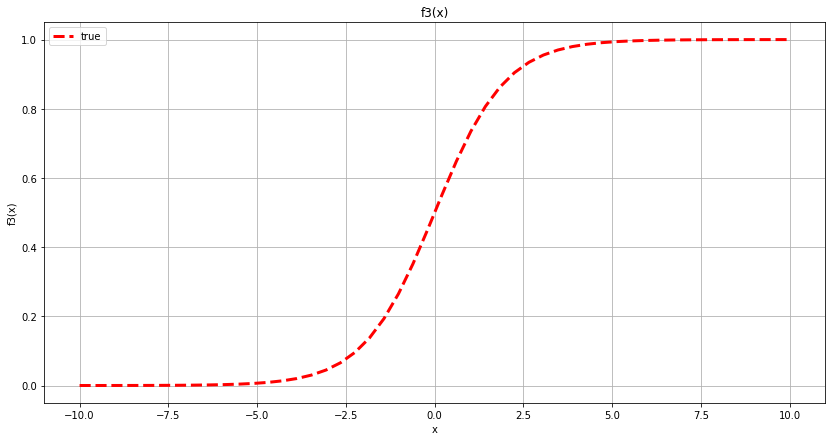

In [ ]:
x = np.linspace(-10, 10)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y, color = 'red', label = 'true', linestyle= 'dashed', linewidth = 3)

plt.xlabel("x")
plt.ylabel("f3(x)")

plt.legend()
plt.grid()
plt.title("f3(x)")
plt.gcf().set_size_inches(14,7)

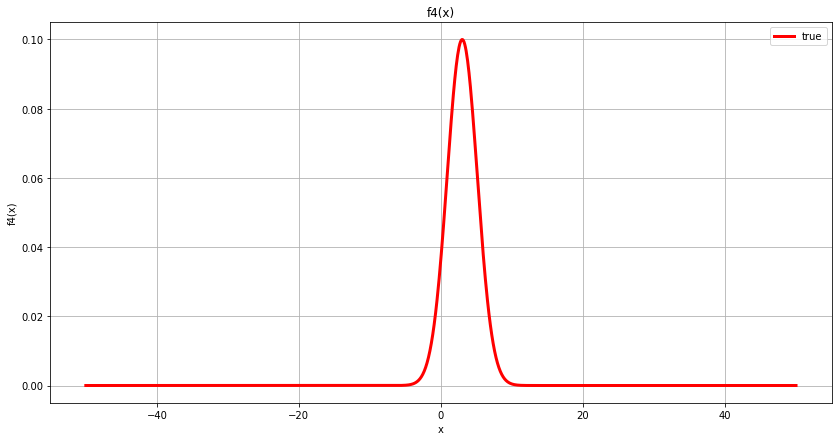

In [ ]:
x = np.linspace(-50, 50, 1000)
u = 3
b = 3
y = 1 / (u**2 + 1) * np.exp(-(x-u)**2 / b**2)

plt.plot(x, y, color = 'red', label = 'true', linewidth = 3)

plt.xlabel("x")
plt.ylabel("f4(x)")

plt.legend()
plt.grid()
plt.title("f4(x)")
plt.gcf().set_size_inches(14,7)

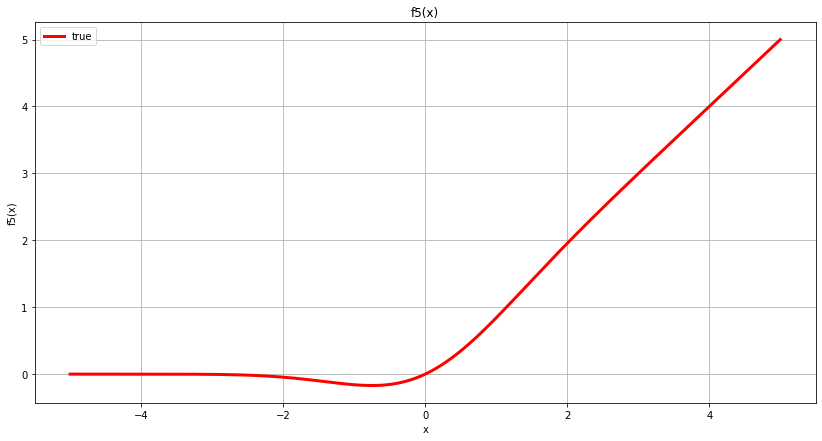

In [ ]:
x = np.linspace(-5, 5, 1000)
y = 0.5 * x * (1 + np.tanh(0.797885 * x + 0.035677 * x**3))

plt.plot(x, y, color = 'red', label = 'true', linewidth = 3)

plt.xlabel("x")
plt.ylabel("f5(x)")

plt.legend()
plt.grid()
plt.title("f5(x)")
plt.gcf().set_size_inches(14,7)

## 5. Prettify Plot

Given the below plot, make it look presentable. Add **square** markers to scatter plots, **dashdotted** lines, add relevant axis **limits** and **ticks**, a **legend** and a **title**. 

**NB**: A plot should be self-contained. Any reader should understand it without have to refer to its text description. 


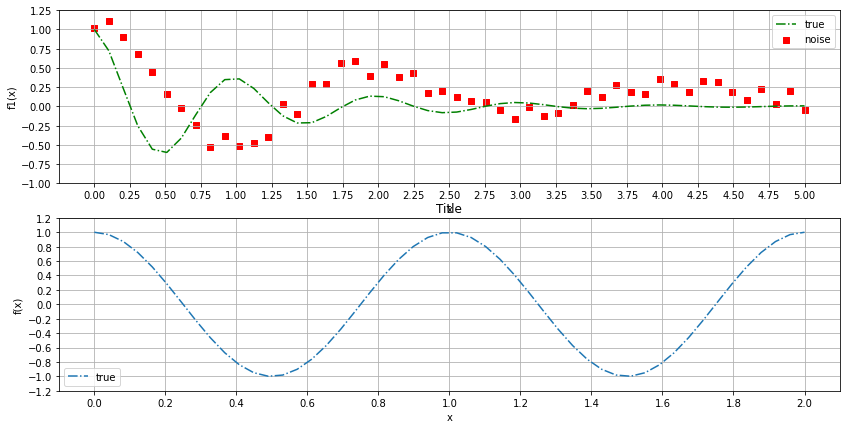

In [ ]:
# Data Synthetization
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)
y3 = np.cos(1 * np.pi * x1) * np.exp(-0.5 * x1) + 0.3 * np.random.random(size = x1.shape)

# Plotting code
# TODO make this pretty.

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.set_ylabel("f1(x)")
ax1.set_xlabel('x')

ax1.plot(x1, y1, label = 'true', linestyle = 'dashdot', color = 'green')
ax1.scatter(x1, y3, label = 'noise', marker = 's', color = 'red')
ax1.get_xaxis().set_ticks(np.arange(0, 5.25, 0.25))
ax1.get_yaxis().set_ticks(np.arange(-1, 1.5, 0.25))
ax1.grid()
ax1.legend()

ax2.plot(x2, y2, label = 'true', linestyle = 'dashdot')
ax2.set_ylabel("f(x)")
ax2.set_xlabel('x')
ax2.get_xaxis().set_ticks(np.arange(0, 2.2, 0.2))
ax2.get_yaxis().set_ticks(np.arange(-1.2, 1.4, 0.2))
ax2.grid()


ax2.legend()
plt.title("Title")
plt.gcf().set_size_inches(14, 7)

# 6. Plotting a dataset

Plot different aspects of the Wine Dataset from sklearn. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.

**6.1** Create a plot for visualizing the distribution of one features (e.g. alchohol level / malic acid / ash etc.) for each class of wine.

**6.2** Create 3 subplots highlighting different aspects of the dataset. Choose the appropriate plot types (scatter plot, line plot, bar plot, box plot etc.). You can choose various combinations of columns to gain a better understanding of this dataset.

Be creative! You can color your points using the `target` array. Remember to always have labels on your axes, appropriate ticks, a legend where necessary, and a plot title.

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


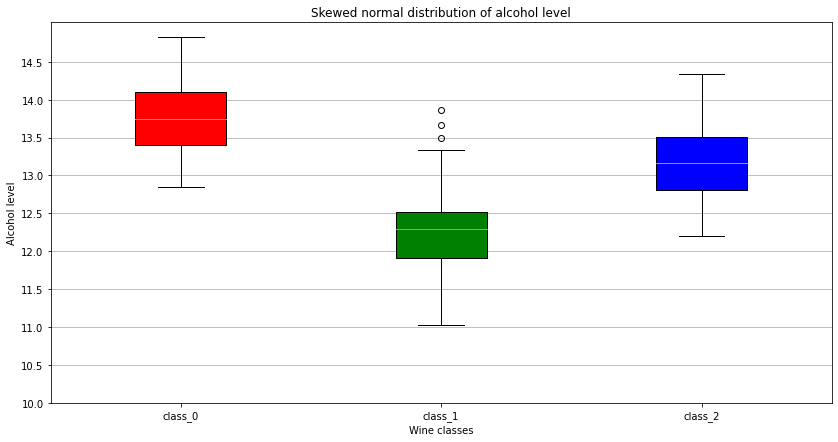

In [ ]:
from sklearn.datasets import load_wine

wine_dataset = load_wine()

data = wine_dataset['data']
target = wine_dataset['target']

column_names = wine_dataset['feature_names']
print(column_names)
# TODO your code here
alcohol_classes = [data[:59, 0], data[59:130, 0], data[130:, 0]]
colors = ['r', 'g', 'b']
ax = plt.subplot()
bplot = ax.boxplot(alcohol_classes, vert = True, widths = 0.35, patch_artist=True, labels = wine_dataset.target_names)
for patch, color in zip(bplot['boxes'], colors):
  patch.set_facecolor(color)
plt.title("Skewed normal distribution of alcohol level")
plt.xlabel('Wine classes')
plt.ylabel('Alcohol level')
ax.get_yaxis().set_ticks(np.arange(10, 15, 0.5))

ax.yaxis.grid(True)
plt.gcf().set_size_inches(14, 7)

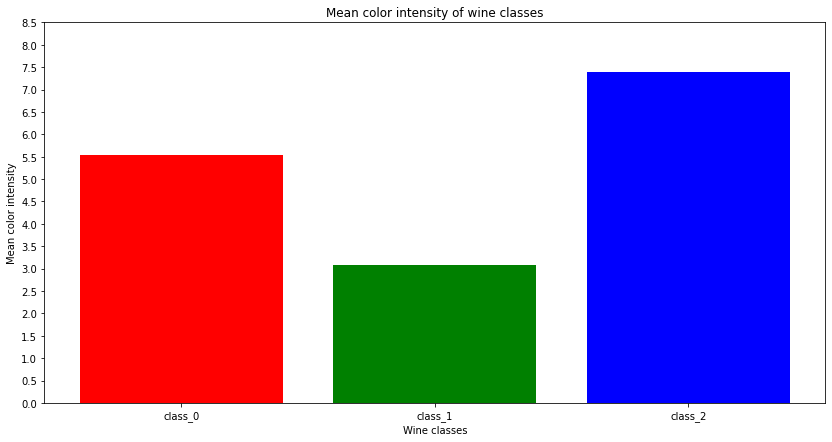

In [ ]:
mean_color_int = [np.mean(data[:59, 9]), np.mean(data[59:130, 9]), np.mean(data[130:, 9])]

ax = plt.subplot()
ax.bar(wine_dataset.target_names, mean_color_int, color = colors)

plt.xlabel('Wine classes')
plt.ylabel("Mean color intensity")
ax.get_yaxis().set_ticks(np.arange(0, 9, 0.5))

plt.title("Mean color intensity of wine classes")
plt.gcf().set_size_inches(14, 7)

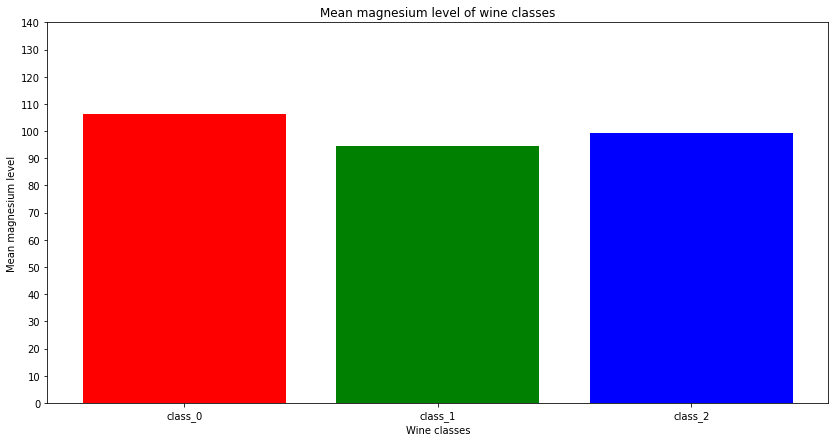

In [ ]:
mean_magnesium_level = [np.mean(data[:59, 4]), np.mean(data[59:130, 4]), np.mean(data[130:, 4])]

ax = plt.subplot()
ax.bar(wine_dataset.target_names, mean_magnesium_level, color = colors)

plt.xlabel('Wine classes')
plt.ylabel("Mean magnesium level")
ax.get_yaxis().set_ticks(np.arange(0, 150, 10))

plt.title("Mean magnesium level of wine classes")
plt.gcf().set_size_inches(14, 7)

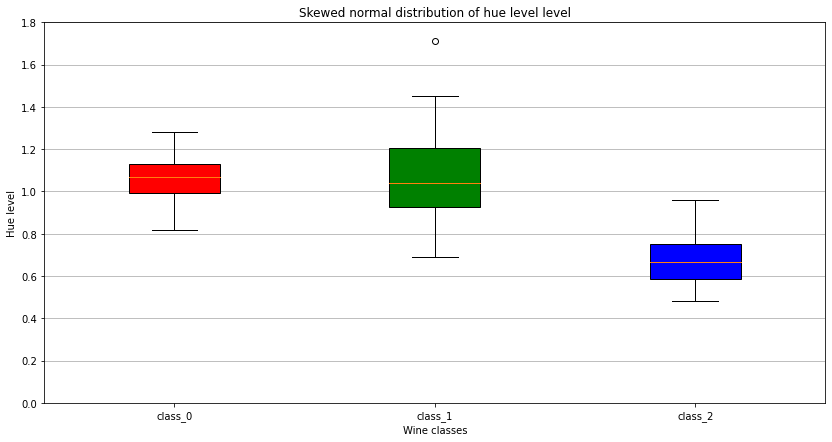

In [ ]:
hue_level = [data[:59, 10], data[59:130, 10], data[130:, 10]]

ax = plt.subplot()
bplot = ax.boxplot(hue_level, vert = True, widths = 0.35, patch_artist=True, labels = wine_dataset.target_names)
for patch, color in zip(bplot['boxes'], colors):
  patch.set_facecolor(color)
plt.title("Skewed normal distribution of hue level level")
plt.xlabel('Wine classes')
plt.ylabel('Hue level')
ax.get_yaxis().set_ticks(np.arange(0, 2, 0.2))

ax.yaxis.grid(True)
plt.gcf().set_size_inches(14, 7)

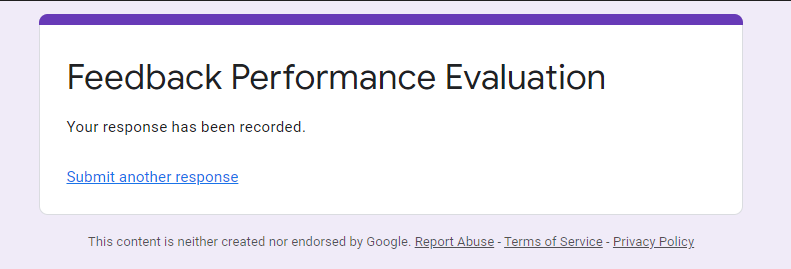